In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat


In [24]:

# select random points
def init_centroids(X, k):
   m, n = X.shape
   centroids = np.zeros((k, n))
   idx = np.random.randint(0, m, k)  #
   
   for i in range(k):
       centroids[i,:] = X[idx[i],:]
   
   return centroids


# 3centroid function // selection
def find_closest_centroids(X, centroids):
   m = X.shape[0]
   k = centroids.shape[0]
   idx = np.zeros(m)
   
   
   for i in range(m):
       min_dist = 1000000
       for j in range(k):
           dist = np.sum((X[i,:] - centroids[j,:]) ** 2)
           if dist < min_dist:
               min_dist = dist
               idx[i] = j
   
   return idx

# centroid maker
def compute_centroids(X, idx, k):
   m, n = X.shape
   centroids = np.zeros((k, n))
   
   for i in range(k): #k == o /1 /2 
       indices = np.where(idx == i)
       centroids[i,:] = (np.sum(X[indices,:], axis=1) / len(indices[0])).ravel()
   
   return centroids

# k means function
def run_k_means(X, initial_centroids,  ):
   m, n = X.shape
   k = initial_centroids.shape[0]
   idx = np.zeros(m)
   centroids = initial_centroids
   
   for i in range(max_iters):
       idx = find_closest_centroids(X, centroids) # selection 
       centroids = compute_centroids(X, idx, k)   
   
   return idx, centroids




def pca(X):
   # normalize the features
   X = (X - X.mean()) / X.std()
   
   # compute the covariance matrix
   X = np.matrix(X)
   cov = (X.T * X) / X.shape[0]
#    print('cov \n', cov)
#    print()
   # perform SVD
   U, S, V = np.linalg.svd(cov) # singular value decomposition
   
   return U, S, V

def project_data(X, U, k):
   U_reduced = U[:,:k]
   return np.dot(X, U_reduced)



def recover_data(Z, U, k):
   U_reduced = U[:,:k]
   return np.dot(Z, U_reduced.T)


In [25]:
# 1 load data

data = loadmat('C:\\Users\\Samira Dihadril\\2-Machine_Learning\\UnSupervisedLearning\\ex7data2.mat')
# print(data)
# print(data['X'])
print(data['X'].shape)


(300, 2)


In [37]:
#2 classify points 
X = data['X']
# initial_centroids = np.array([[3, 3], [6, 2], [8, 5]]) # random centers  or
# initial_centroids = np.array([[8, 0], [8, 6], [0, 3]])
initial_centroids =  init_centroids(X, 3)               
print(initial_centroids )

[[5.14533035 4.13225692]
 [6.17443157 3.29026488]
 [2.47053695 4.80418944]]


In [27]:
# 3 centroid function // selection
idx = find_closest_centroids(X, initial_centroids)
print(idx)

[2. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 1. 2. 1. 2. 2. 1.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 1. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 1. 1. 1. 2. 2. 2. 0. 2. 2. 2. 1. 2. 2. 2. 1. 2. 2. 2.
 2. 2. 2. 2. 0. 2. 0. 1. 0. 2. 0. 0. 2. 0. 2. 1. 2. 0. 2. 2. 2. 2. 0. 2.
 2. 0. 0. 0. 0. 2. 2. 0. 2. 2. 0. 0. 2. 2. 2. 2. 2. 2. 0. 0. 0. 0. 2. 2.
 2. 0. 2. 0. 2. 1. 2. 0. 2. 2. 2. 2. 2. 2. 0. 0. 0. 0. 2. 0. 2. 2. 2. 2.
 2. 0. 2. 0. 2. 0. 0. 2. 0. 0. 2. 2. 0. 2. 2. 0. 0. 0. 2. 0. 2. 2. 2. 2.
 2. 0. 2. 2. 0. 2. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]


[[6.03366736 3.00052511]
 [1.95399466 5.02557006]
 [3.04367119 1.01541041]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[4.431529

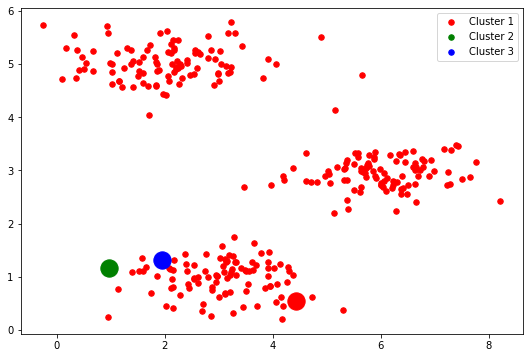

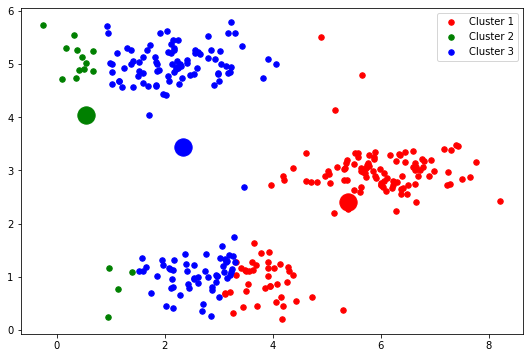

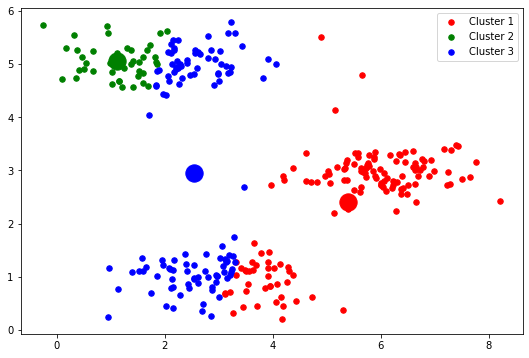

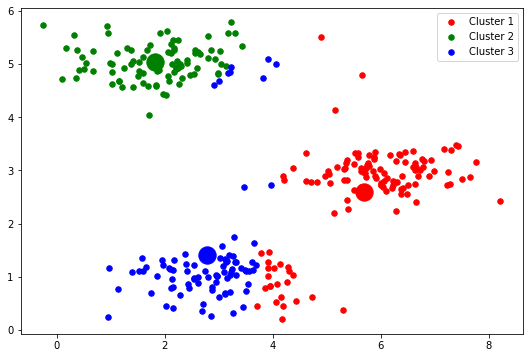

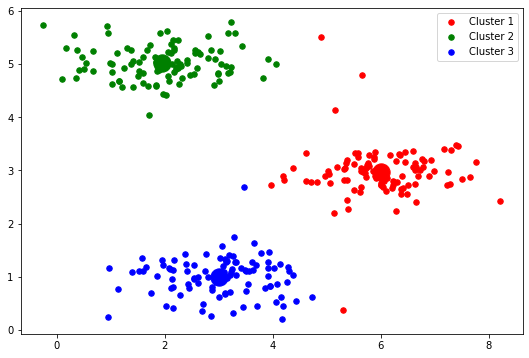

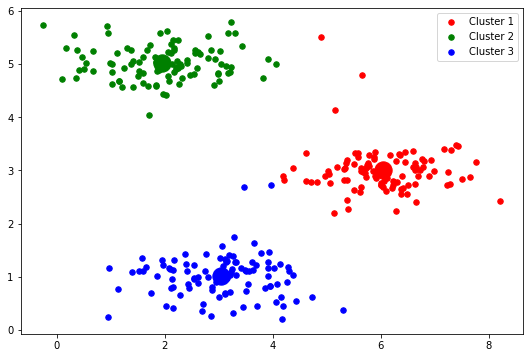

In [35]:
# calculate new centroid

c = compute_centroids(X, idx, 3)
print(c)

for x in range(6): # 6 steps 
#     apply k means 
    idx, centroids = run_k_means(X, initial_centroids, x)  # x= max itertaions nb

    print(idx)
    print(centroids)
   
   
# draw it
    cluster1 = X[np.where(idx == 0)[0],:]
    cluster2 = X[np.where(idx == 1)[0],:]
    cluster3 = X[np.where(idx == 2)[0],:]
   
    fig, ax = plt.subplots(figsize=(9,6))
    ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
    ax.scatter(centroids[0,0],centroids[0,1],s=300, color='r')
   
    ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
    ax.scatter(centroids[1,0],centroids[1,1],s=300, color='g')
   
    ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
    ax.scatter(centroids[2,0],centroids[2,1],s=300, color='b')
   
    ax.legend()

